In [1]:
#инициализация библиотеки для работы с НС - нужно её кратко описать
import torch

In [2]:
#инициализация общих библиотек
import numpy as np
import random
from IPython.core.display import Image, display
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100500)

In [3]:
#объявление нужных нам компонерт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.autograd import Variable
#import pdb

In [4]:
#функция, которая выведет результаты предсказания для тестового множества
def make_solution_pytorch(net, test_no_classes):
    res = []
    net.eval()
    for data in test_no_classes:
        predict = np.argmax(net.forward(data))
        res.append(predict)
    return res

In [5]:
#функция для расчёта достоверности предсказания
def acc_check(net, validation_X, validation_Y):
    acc = 0.
    net=net.eval()
    outputs = net(Variable(validation_X, volatile=True))
    _, predicted = torch.max(outputs.data, 1)
    predicted.squeeze_()
    y_pred=predicted.cpu().numpy()
    validation_Y=validation_Y.numpy()
    for i in range(validation_X.size(0)):
        if(y_pred[i] == validation_Y[i]):
            acc += 1
    return acc / validation_X.size(0)

In [6]:
#загрузка файла с данными - лучше обсудить этот вопрос со мной отдельно
#all_d = pd.read_csv(r'C:\Users\1\Desktop\iskh_csv.csv', sep=';', encoding='utf-8', decimal=',')
all_d = pd.read_excel(r'C:\Jypiter\Data_for_neural_network_2.xlsx')

In [7]:
all_d

,Наименование,X6,X16,X26,X31,X39,Class
0,Абдулинский,20.8,58.5,69,15626,0.1,1.0
1,Адамовский,12.4,93.0,180,23410,1.4,3.0
2,Акбулакский,11.9,39.8,224,9855,0.7,3.0
3,Александровский,13.6,55.0,116,4881,0.2,3.0
4,Асекеевский,17.2,63.5,172,15466,5.3,1.0
5,Беляевский,14.7,50.8,163,12186,0.1,3.0
6,Бугурусланский,19.4,62.0,104,7621,2.1,1.0
7,Бузулукский,18.6,43.4,142,9143,6.2,1.0
8,Гайский,17.7,75.3,77,28919,0.2,1.0
9,Грачевский,15.2,70.4,61,14864,22.2,1.0


In [8]:
#считаем количество возможных классов
num_classes=all_d.groupby('Class')['Наименование'].nunique().shape[0]

In [9]:
all_d.groupby('Class')['Наименование'].nunique().shape[0]

3

In [10]:
#берём объекты, где классы известны, то есть обучающую выборку
train=all_d.ix[(all_d['Class']>0)]

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
#вычитаем из наших классов 1, так как у нас нумерация классов с 1, а у питона с 0 все числа, соответственно
#он придумвает ещё один класс, которого на самом деле нет
train['Class']=train['Class'].apply(lambda x: x-1)

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#создание тестового множества - множества объектов, у которых класс исходно неизвестен
testt=all_d.ix[(np.isnan(all_d['Class']))]

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [13]:
#удаление ненужных нам столбцов
test2=testt.drop(['Class', 'Наименование'], axis=1)
train2=train.drop(['Наименование'],  axis=1)

In [14]:
#преобразование таблиц с данными в матрицы
train=train2.as_matrix()
test=test2.as_matrix()

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#вытаскивание меток классов
train_X,train_Y = np.hsplit(train, [train.shape[1]-1])

In [16]:
#явное создание матрицы тестового множества
test_X=test

In [17]:
#расчёт среднего и ст отклонения
train_X_mean = train_X.mean(axis=0)
train_X_std = train_X.std(axis=0)

In [18]:
#стандартизация
train_X_tensor = torch.from_numpy( (train_X-train_X_mean)/train_X_std ).float()
train_Y_tensor = torch.from_numpy(train_Y).long()
test_X_tensor = torch.from_numpy( (test_X-train_X_mean)/train_X_std ).float()

In [19]:
#создание валидационной выборки - сделать stratified
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    train_X_tensor.numpy(), train_Y_tensor.numpy(), test_size=0.01, random_state=42)

In [20]:
#нейросетевая библиотечка работает только с тензорами - соответсвенно, преобразование матриц в тензоры
X_train=torch.from_numpy(X_train)
X_val=torch.from_numpy(X_val)
Y_train=torch.from_numpy(Y_train)
Y_val=torch.from_numpy(Y_val)

In [21]:
#класс-нейросеть
hidden_neurons=10
class Net(nn.Module):
    #объявляем слои сети
    def __init__(self, dropout=False, batchnorm=False):
        super(Net, self).__init__()
        self.bn1 = nn.BatchNorm1d(X_train.shape[1])#батч-нормализация
        self.fc1 = nn.Linear(X_train.shape[1], hidden_neurons)#первый линейный
        self.act1=nn.Tanh()#сигмоидная активация
        self.drop=nn.Dropout(p=0.25)#дропаут
        self.fc2 = nn.Linear(hidden_neurons, num_classes)#второй линейный
        #int((X_train.shape[1]+num_classes)/2)
        self.act2=nn.Softmax()#активация-софтмакс
        
        for m in self.modules():#инициализиация весов
            if isinstance(m, nn.Linear):#Ксавьер
                in_size=m.in_features
                m.weight.data.normal_(0, np.sqrt(1.0/in_size))

    def forward(self, x):#применение слоёв
        x = self.bn1(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x
    
    #L2-регуляризатор
    def L2_loss(self, lambd):
        l2=torch.mul((torch.norm(self.fc1.weight, 2)+\
                      torch.norm(self.fc2.weight, 2)\
                      ), lambd)
        return l2
   
net = Net()

In [22]:
import torch.optim as optim
#выбор функции потерь и оптимизатора - в данном случае кросс-энтропия и стохастический градиентный спуск соответственно
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Do epoch 0 with loss 1.1560513377189636
Do epoch 1 with loss 1.1272201140721638
Do epoch 2 with loss 1.1380755305290222
Do epoch 3 with loss 1.1235051155090332
Do epoch 4 with loss 1.1665554642677307
Do epoch 5 with loss 1.1530698736508687
Do epoch 6 with loss 1.147250235080719
Do epoch 7 with loss 1.155932645003001
Do epoch 8 with loss 1.1767463088035583
Do epoch 9 with loss 1.1550096074740093
Do epoch 10 with loss 1.11013525724411
Do epoch 11 with loss 1.1425182223320007
Do epoch 12 with loss 1.1470365524291992
Do epoch 13 with loss 1.152609686056773
Do epoch 14 with loss 1.1187725861867268
Do epoch 15 with loss 1.1554476817448933
Do epoch 16 with loss 1.1441001296043396
Do epoch 17 with loss 1.1676235993703206
Do epoch 18 with loss 1.133589247862498
Do epoch 19 with loss 1.1606440742810566
Do epoch 20 with loss 1.109165867169698
Do epoch 21 with loss 1.1253877679506938
Do epoch 22 with loss 1.1589808464050293
Do epoch 23 with loss 1.1223898927370708
Do epoch 24 with loss 1.167129596

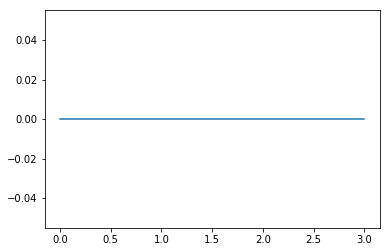

In [23]:
#подбор лучшего размера батча
batch_acc=[]
q1=0
for BATCH_SIZE in [5, 10, 15, 20]:
    net=Net()
    loss_curve=[]
    for epoch in range(50):  # loop over the dataset multiple times
        idx = np.array(list(range(len(X_train))))
        np.random.shuffle(idx)
        running_loss=0.0
        for batch_id in range(X_train.size()[0]//BATCH_SIZE):

            inputs = X_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])]
            labels = Y_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])].view(BATCH_SIZE)

            # создаём переменные
            inputs, labels = Variable(inputs), Variable(labels)

            # сбрасываем градиенты
            optimizer.zero_grad()

            # предсказываем
            outputs = net(inputs)
            
            #L2-регуляризация
            l2=net.L2_loss(lambd=1e-5)
            #расчёт функции ошибки
            loss_crit = criterion(outputs, labels)
            loss=loss_crit+l2
            #обратное распространение ошибки
            loss.backward()
            #шаг оптимизатора
            optimizer.step()

            running_loss += loss.data[0]
        avg_epoch_loss = running_loss / (X_train.size()[0]//BATCH_SIZE)
        print('Do epoch %s with loss %s' % (epoch, avg_epoch_loss ))
        loss_curve.append(avg_epoch_loss)
    q1=acc_check(net, X_val, Y_val)
    batch_acc.append(q1)
    q1=0

plt.plot(batch_acc)
print('Finished Training')

Do epoch 0 with loss 1.034621000289917
Do epoch 1 with loss 1.0508227348327637
Do epoch 2 with loss 1.0811448097229004
Do epoch 3 with loss 1.0470199584960938
Do epoch 4 with loss 1.0140835046768188
Do epoch 5 with loss 1.0579066276550293
Do epoch 6 with loss 1.077654242515564
Do epoch 7 with loss 1.0964399576187134
Do epoch 8 with loss 1.006357192993164
Do epoch 9 with loss 1.1216379404067993
Do epoch 10 with loss 1.0463517904281616
Do epoch 11 with loss 1.0605292320251465
Do epoch 12 with loss 1.0301457643508911
Do epoch 13 with loss 1.0394222736358643
Do epoch 14 with loss 1.0404125452041626
Do epoch 15 with loss 1.0239324569702148
Do epoch 16 with loss 1.0200715065002441
Do epoch 17 with loss 1.0632482767105103
Do epoch 18 with loss 1.0076576471328735
Do epoch 19 with loss 1.0710783004760742
Do epoch 20 with loss 1.0760481357574463
Do epoch 21 with loss 1.0752590894699097
Do epoch 22 with loss 1.0531306266784668
Do epoch 23 with loss 1.0296326875686646
Do epoch 24 with loss 1.07729

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


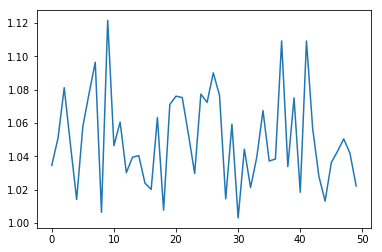

In [24]:
#обучение на лучшем размере батча
best_batch=20
batch_acc=[]
min_loss=1e18
min_epoch=0
q1=0
for BATCH_SIZE in [best_batch]:
    net=Net()
    #net = net.cuda(1)
    loss_curve=[]
    for epoch in range(50):  # loop over the dataset multiple times
        idx = np.array(list(range(len(X_train))))
        np.random.shuffle(idx)
        running_loss = 0.0
        for batch_id in range(X_train.size()[0]//BATCH_SIZE):

            inputs = X_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])]
            labels = Y_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])].view(BATCH_SIZE)

            # создаём переменные
            inputs, labels = Variable(inputs), Variable(labels)

            # сбрасываем градиенты
            optimizer.zero_grad()

            # предсказываем
            outputs = net(inputs)
            
            #L2-регуляризация
            l2=net.L2_loss(lambd=1e-5)
            #расчёт функции ошибки
            loss_crit = criterion(outputs, labels)
            loss=loss_crit+l2
            #обратное распространение ошибки
            loss.backward()
            #шаг оптимизатора
            optimizer.step()
            
            #расчёт минимального значения функции ошибки
            if loss.data[0]<min_loss:
                min_loss=loss.data[0]
                min_epoch=epoch
            
            running_loss += loss.data[0]
        avg_epoch_loss = running_loss / (X_train.size()[0]//BATCH_SIZE)
        print('Do epoch %s with loss %s' % (epoch, avg_epoch_loss ))
        loss_curve.append(avg_epoch_loss)
    q1=acc_check(net, X_val, Y_val)
    batch_acc.append(q1)
    q1=0

plt.plot(loss_curve)
print('Finished Training')

In [25]:
print('ОТЧЁТ')
print('1. Признаки, на которых обучаем:')
for k in range(5):
    print(all_d.columns[k+1])
print('2. Количество нейронов входного слоя:', X_train.shape[1])
print('3. Количество нейронов скрытого слоя:', hidden_neurons)
print('4. Количество нейронов выходного слоя:', num_classes)
print('5. Количество эпох:', epoch+1)
print('6. Минимальное значение функции ошибки:', min_loss)
print('Номер соответствующей эпохи:', min_epoch)
print('7. Выходное значение функции ошибки:', loss.data[0])
print('8. Функция активации скрытого слоя:', net.act1)
print('9. Функция активации выходного слоя:', net.act2)
print('10. Архитектура сети:', net)
print('11. Веса W1:', net.fc1.weight.data)
print('12. Веса W2:', net.fc2.weight.data)

ОТЧЁТ
1. Признаки, на которых обучаем:
X6
X16
X26
X31
X39
2. Количество нейронов входного слоя: 5
3. Количество нейронов скрытого слоя: 10
4. Количество нейронов выходного слоя: 3
5. Количество эпох: 50
6. Минимальное значение функции ошибки: 1.0029891729354858
Номер соответствующей эпохи: 30
7. Выходное значение функции ошибки: 1.0221514701843262
8. Функция активации скрытого слоя: Tanh()
9. Функция активации выходного слоя: Softmax()
10. Архитектура сети: Net(
  (bn1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True)
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (act1): Tanh()
  (drop): Dropout(p=0.25)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (act2): Softmax()
)
11. Веса W1: 
-0.1677  0.1686  0.4316  0.1753  1.0485
 0.5161 -0.0748  0.1018  0.1630 -0.0909
 0.4253  0.3949 -0.2194  0.7860  0.0298
-0.5392 -0.3911 -1.0093  0.3283 -0.4154
 0.3110  0.5919 -0.3564  0.1718  0.1405
 0.0993 -0.3782 -0.0954  0.1490 -0.3445
 0.1827 -0.1205  0.0753 -0.2165 -0

In [26]:
#переключение сети в режим предсказания
net = net.eval()

In [27]:
#применим нейросеть ко всему массиву данных в целях дальнейшего исследования
all_res=all_d.drop(['Class', 'Наименование'], axis=1)

In [28]:
all_res_m=all_res.as_matrix()

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [29]:
all_res_m=(all_res_m-train_X_mean)/train_X_std

In [30]:
all_tensor=torch.from_numpy(all_res_m).float()

In [31]:
#запись результатов сети в переменную
outputs2 = net(Variable(all_tensor, volatile=True))

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [32]:
_, predicted2 = torch.max(outputs2.data, 1)
torch.add(predicted2.squeeze_(), 1)


 1
 1
 1
 1
 1
 1
 1
 1
 1
 3
 1
 1
 3
 3
 1
 3
 1
 1
 3
 1
 2
 3
 3
 1
 1
 3
 1
 1
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 2
 1
 3
 3
 3
 3
 1
 1
 3
[torch.LongTensor of size 47]

In [33]:
#вывод предсказаний в файл
solution = predicted2.tolist()
with open('predictions.csv', 'w') as fout:
    print('Id', 'Prediction', sep=';', file=fout)
    for i, prediction in enumerate(solution):
        print(list(all_d['Наименование'])[i], prediction+1, sep=';', file=fout)

In [34]:
res_list


NameError: name 'res_list' is not defined